<a href="https://colab.research.google.com/github/sarnika09-cell/Predictive-Modeling-of-Global-Internet-Usage-Trends/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving number-of-internet-users.csv to number-of-internet-users.csv


In [ ]:
import pandas as pd
df = pd.read_csv("number-of-internet-users.csv")
df.head()


,country,Year,Number of Internet users
0,Afghanistan,1990,0.0
1,Afghanistan,1991,0.0
2,Afghanistan,1992,0.0
3,Afghanistan,1993,0.0
4,Afghanistan,1994,0.0


In [ ]:
# ==========================================
# 🧩 Step 1: Import Required Libraries
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

# Make plots look clean
plt.style.use('seaborn-v0_8')
sns.set_theme()

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [ ]:
# ==========================================
# 🧩 Step 2: Upload & Load Dataset
# ==========================================

print("📁 Please choose your dataset file (number-of-internet-users.csv)")
uploaded = files.upload()   # Opens a file picker in Colab

# Read the uploaded CSV into a DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"✅ Loaded '{filename}' successfully!")

print("\nDataset Preview:")
display(df.head())          # Show first 5 rows

print("\nDataset Info:")
df.info()                   # Show column names, datatypes, and null counts


📁 Please choose your dataset file (number-of-internet-users.csv)


Saving number-of-internet-users.csv to number-of-internet-users (1).csv
✅ Loaded 'number-of-internet-users (1).csv' successfully!

Dataset Preview:


,country,Year,Number of Internet users
0,Afghanistan,1990,0.0
1,Afghanistan,1991,0.0
2,Afghanistan,1992,0.0
3,Afghanistan,1993,0.0
4,Afghanistan,1994,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   6893 non-null   object 
 1   Year                      6893 non-null   int64  
 2   Number of Internet users  6893 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.7+ KB


In [ ]:
# ==========================================
# 🧩 Step 3: Explore & Clean Data
# ==========================================

print("\nColumns in dataset:")
print(df.columns.tolist())

# Clean column names (remove spaces, make lowercase)
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

# Identify numeric columns only
numeric_df = df.select_dtypes(include=['number'])
print("\nNumeric Columns:", numeric_df.columns.tolist())

# Detect 'year' column automatically
possible_year_cols = [c for c in df.columns if 'year' in c.lower()]
if possible_year_cols:
    year_col = possible_year_cols[0]
    print(f"\nDetected year column: {year_col}")
else:
    year_col = df.columns[0]   # fallback if no explicit year column

# Use the last numeric column as our target (internet users)
target_col = numeric_df.columns[-1]

# Group by year (sum total users per year)
data = df.groupby(year_col)[target_col].sum().reset_index()

print("\n Cleaned Dataset Preview:")
display(data.head())



Columns in dataset:
['country', 'year', 'number_of_internet_users']

Numeric Columns: ['year', 'number_of_internet_users']

Detected year column: year

 Cleaned Dataset Preview:


,year,number_of_internet_users
0,1960,0.0
1,1965,0.0
2,1970,0.0
3,1975,0.0
4,1976,0.0


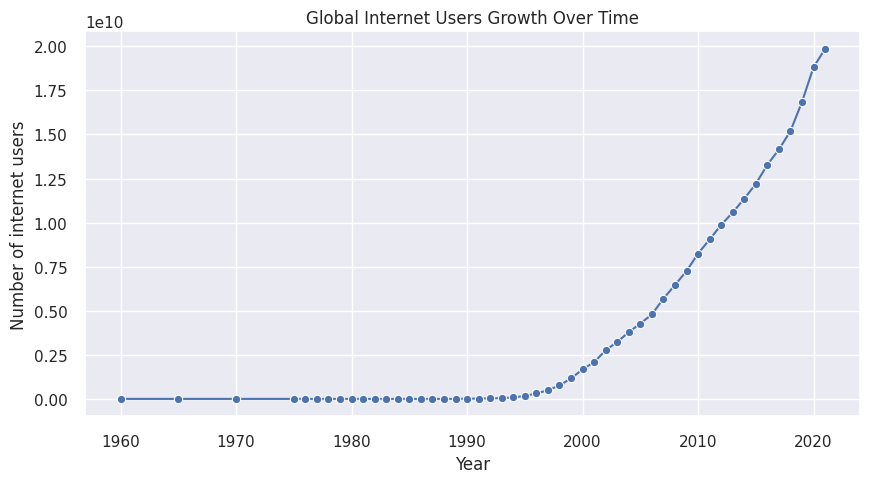

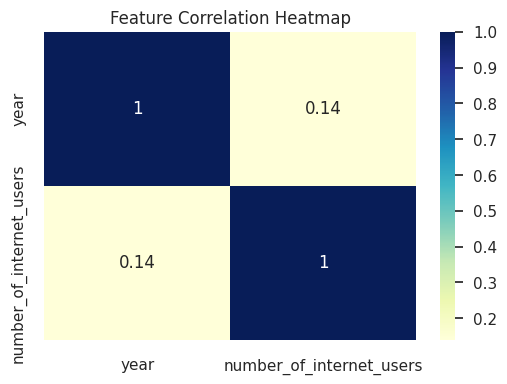

In [ ]:
# ==========================================
# 🧩 Step 4: Visualization
# ==========================================

plt.figure(figsize=(10,5))
sns.lineplot(data=data, x=data.columns[0], y=data.columns[-1], marker="o")
plt.title("Global Internet Users Growth Over Time")
plt.xlabel(data.columns[0].capitalize())
plt.ylabel(data.columns[-1].replace("_"," ").capitalize())
plt.grid(True)
plt.show()

# Optional: show correlation between numeric features
if len(numeric_df.columns) > 1:
    plt.figure(figsize=(6,4))
    sns.heatmap(numeric_df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
    plt.title("Feature Correlation Heatmap")
    plt.show()


In [ ]:
# ==========================================
# 🧩 Step 5: Linear Regression Model
# ==========================================

X = data.iloc[:, 0].values.reshape(-1, 1)   # Year
y = data.iloc[:, -1].values.reshape(-1, 1)  # Users

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")



Model Performance:
MAE: 3209546917.645
MSE: 13786615132858517504.000
R² Score: 0.664


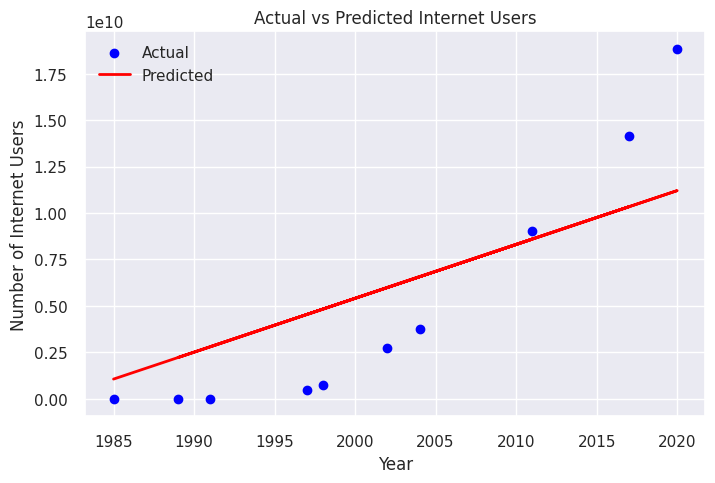

In [ ]:
# ==========================================
# 🧩 Step 6: Plot Actual vs Predicted
# ==========================================

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Actual vs Predicted Internet Users")
plt.xlabel("Year")
plt.ylabel("Number of Internet Users")
plt.legend()
plt.show()


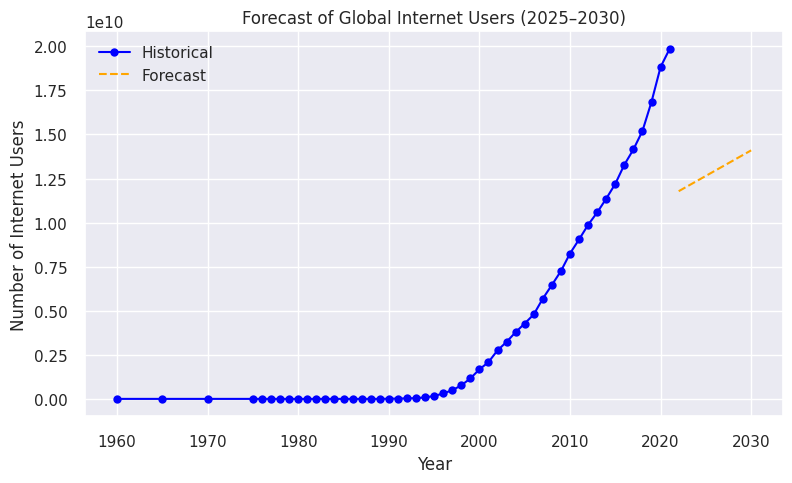


Future Forecasts:
2022 → 11782523635.67
2023 → 12072178825.32
2024 → 12361834014.96
2025 → 12651489204.60
2026 → 12941144394.24
2027 → 13230799583.88
2028 → 13520454773.52
2029 → 13810109963.16
2030 → 14099765152.80


In [ ]:
# ==========================================
# 🧩 Step 7: Forecast Future (2025–2030)
# ==========================================

last_year = int(data.iloc[-1, 0])
future_years = np.arange(last_year + 1, 2031).reshape(-1, 1)
future_pred = model.predict(future_years)

plt.figure(figsize=(9,5))
plt.plot(data.iloc[:,0], data.iloc[:,-1], label="Historical", color="blue", marker="o")
plt.plot(future_years, future_pred, label="Forecast", color="orange", linestyle="--", marker="x")
plt.title("Forecast of Global Internet Users (2025–2030)")
plt.xlabel("Year")
plt.ylabel("Number of Internet Users")
plt.legend()
plt.grid(True)
plt.show()

print("\nFuture Forecasts:")
for year, val in zip(future_years.flatten(), future_pred.flatten()):
    print(f"{int(year)} → {val:.2f}")


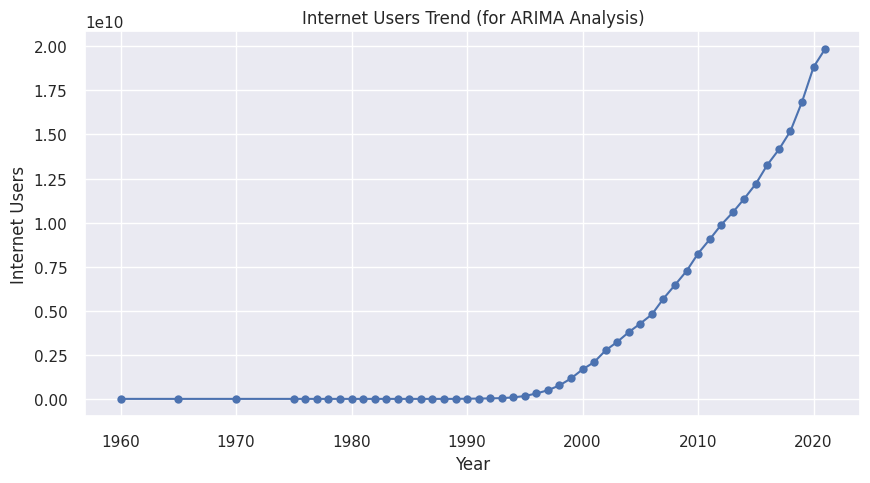

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1004.005
Date:                Fri, 07 Nov 2025   AIC                           2014.011
Time:                        15:58:03   BIC                           2019.686
Sample:                             0   HQIC                          2016.164
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.040     25.267      0.000       0.922       1.078
ma.L1         -0.4062      0.146     -2.785      0.005      -0.692      -0.120
sigma2       3.97e+16   3.63e-19   1.09e+35      0.0

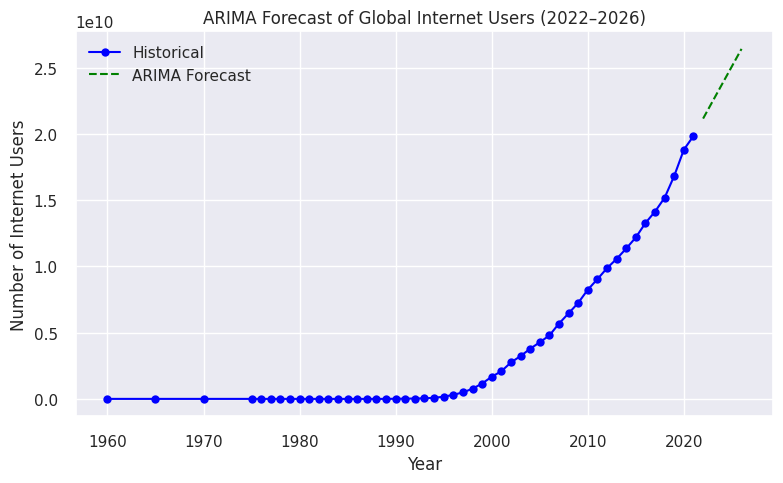


ARIMA Forecast Results:
2022 → 21172222801.44
2023 → 22488019165.24
2024 → 23803806903.86
2025 → 25119586017.38
2026 → 26435356505.83


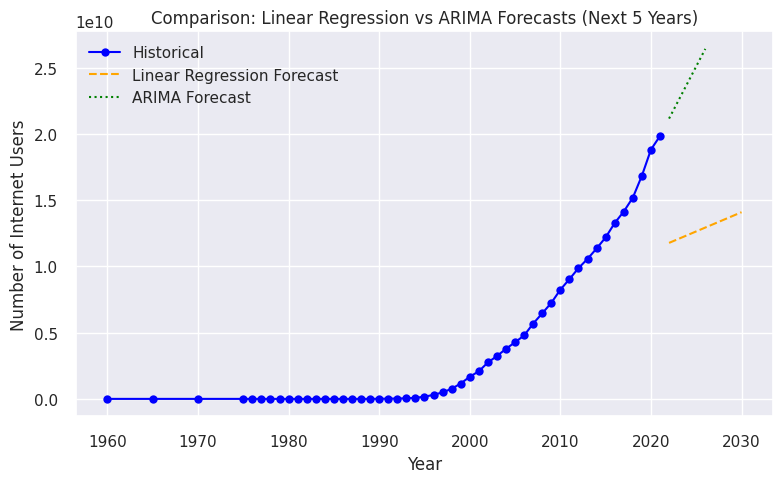

In [ ]:
# ==========================================
# 🧩 Step 8 (Final): Forecasting using ARIMA (auto-adjusted)
# ==========================================

!pip install statsmodels==0.14.2 --quiet

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

# Sort data and extract columns
data = data.sort_values(by=data.columns[0])
years = data.iloc[:, 0].values
users = data.iloc[:, -1].values

plt.figure(figsize=(10,5))
plt.plot(years, users, marker='o')
plt.title("Internet Users Trend (for ARIMA Analysis)")
plt.xlabel("Year")
plt.ylabel("Internet Users")
plt.grid(True)
plt.show()

# ------------------------------------------
# 1️⃣ Fit ARIMA model
# ------------------------------------------
model = ARIMA(users, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

# ------------------------------------------
# 2️⃣ Forecast Future Values (Next 5 Years)
# ------------------------------------------
# Automatically predict for 5 future steps
future_steps = 5
forecast = model_fit.forecast(steps=future_steps)

# Generate year labels for those steps
last_year = int(years[-1])
forecast_years = np.arange(last_year + 1, last_year + future_steps + 1)

# ------------------------------------------
# 3️⃣ Plot ARIMA Forecast
# ------------------------------------------
plt.figure(figsize=(9,5))
plt.plot(years, users, label="Historical", color="blue", marker="o")
plt.plot(forecast_years, forecast, label="ARIMA Forecast", color="green", linestyle="--", marker="x")
plt.title(f"ARIMA Forecast of Global Internet Users ({last_year+1}–{last_year+future_steps})")
plt.xlabel("Year")
plt.ylabel("Number of Internet Users")
plt.legend()
plt.grid(True)
plt.show()

print("\nARIMA Forecast Results:")
for y, f in zip(forecast_years, forecast):
    print(f"{int(y)} → {f:.2f}")

# ------------------------------------------
# 4️⃣ Compare ARIMA vs Linear Regression
# ------------------------------------------
plt.figure(figsize=(9,5))
plt.plot(data.iloc[:,0], data.iloc[:,-1], label="Historical", color="blue", marker="o")
plt.plot(future_years, future_pred, label="Linear Regression Forecast", color="orange", linestyle="--", marker="x")
plt.plot(forecast_years, forecast, label="ARIMA Forecast", color="green", linestyle=":")
plt.title("Comparison: Linear Regression vs ARIMA Forecasts (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Number of Internet Users")
plt.legend()
plt.grid(True)
plt.show()
